# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [7]:
#store cities into a dataframe and setting the first column to "City"

cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df.head()

,City
0,zatoka
1,bethel
2,barrow
3,aksu
4,tiksi


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#creating more empty lists
cities_df["Cloudiness"] = ""
cities_df["Date"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Temperature (F)"] = ""
cities_df["Wind Speed (MPH)"] = ""

cities_df.head()

,City,Cloudiness,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,zatoka,,,,,,,
1,bethel,,,,,,,
2,barrow,,,,,,,
3,aksu,,,,,,,
4,tiksi,,,,,,,


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
cities_df["Latitude"] = int()
cities_df["Longitude"] = int()
cities_df["Temperature (F)"] = int()
cities_df["Humidity (%)"]= int()
cities_df["Cloudiness"] = int()
cities_df["Wind Speed (MPH)"] = int()
for index,row in cities_df.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['City']
    
    
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        cities_df.set_value(index, "Latitude", (cityweather['coord']['lat']))
        cities_df.set_value(index, "Longitude", (cityweather['coord']['lat']))
        cities_df.set_value(index, "Temperature (F)", (cityweather['main']['temp']))
        cities_df.set_value(index, "Humidity (%)", (cityweather['main']['humidity']))
        cities_df.set_value(index, "Cloudiness", (cityweather['clouds']['all']))
        cities_df.set_value(index, "Wind Speed (MPH)", (cityweather['wind']['speed']))
        
        print("Now retieving city #" + str(count) + "|" + str(row["City"]))
        print(query_url)
          
    except KeyError:
        print("City not found. Skipping...")
        
    continue      
          
print('-------------------------------')
print('Data Processing Complete')
print('-------------------------------')

C:\Users\12812\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\12812\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\12812\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\12812\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\12812\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\12812\Anaconda3\lib\s

Now retieving city #1|zatoka
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=zatoka
Now retieving city #2|bethel
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=bethel
Now retieving city #3|barrow
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=barrow
Now retieving city #4|aksu
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=aksu
Now retieving city #5|tiksi
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=tiksi
Now retieving city #6|norman wells
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=norman wells
Now retieving city #7|avarua
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=avarua
Now retieving city #8

Now retieving city #65|rostovka
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=rostovka
Now retieving city #66|butaritari
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=butaritari
Now retieving city #67|vila velha
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=vila velha
Now retieving city #68|saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=saskylakh
Now retieving city #69|kodiak
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kodiak
Now retieving city #70|zlobin
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=zlobin
Now retieving city #71|port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperi

Now retieving city #128|plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=plettenberg bay
Now retieving city #129|codrington
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=codrington
Now retieving city #130|rawson
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=rawson
Now retieving city #131|deep river
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=deep river
Now retieving city #132|saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=saint-philippe
Now retieving city #133|tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=tuktoyaktuk
Now retieving city #134|chabahar
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba

Now retieving city #187|dicabisagan
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=dicabisagan
Now retieving city #188|garliava
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=garliava
Now retieving city #189|margate
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=margate
Now retieving city #190|novyy urgal
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=novyy urgal
Now retieving city #191|labuhan
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=labuhan
Now retieving city #192|airai
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=airai
Now retieving city #193|tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imp

Now retieving city #253|srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=srednekolymsk
Now retieving city #254|aklavik
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=aklavik
Now retieving city #255|moyale
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=moyale
Now retieving city #256|qarchi gak
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=qarchi gak
Now retieving city #257|podgornoye
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=podgornoye
Now retieving city #258|grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=grand gaube
Now retieving city #259|berdigestyakh
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c5

Now retieving city #312|waddan
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=waddan
Now retieving city #313|abu zabad
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=abu zabad
Now retieving city #314|kayes
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kayes
Now retieving city #315|sakaiminato
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=sakaiminato
Now retieving city #316|kiama
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kiama
Now retieving city #317|aquiraz
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=aquiraz
Now retieving city #318|nome
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=nome
Now

Now retieving city #371|iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=iqaluit
Now retieving city #372|port shepstone
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=port shepstone
Now retieving city #373|leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=leningradskiy
City not found. Skipping...
City not found. Skipping...
Now retieving city #376|port hedland
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=port hedland
Now retieving city #377|milkovo
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=milkovo
Now retieving city #378|kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kaitangata
Now retieving city #379|gondal
http://api.op

Now retieving city #438|orje
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=orje
Now retieving city #439|achacachi
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=achacachi
Now retieving city #440|san andres
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=san andres
Now retieving city #441|sacadat
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=sacadat
Now retieving city #442|kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kangaatsiaq
Now retieving city #443|ekibastuz
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=ekibastuz
Now retieving city #444|lazarev
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Im

Now retieving city #501|kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kruisfontein
Now retieving city #502|kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=kalmunai
Now retieving city #503|yarovoye
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=yarovoye
Now retieving city #504|astoria
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=astoria
Now retieving city #505|valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=valparaiso
Now retieving city #506|dolzhanskaya
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=dolzhanskaya
Now retieving city #507|tucuman
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e3

City not found. Skipping...
Now retieving city #562|durban
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=durban
Now retieving city #563|churachandpur
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=churachandpur
Now retieving city #564|belmonte
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=belmonte
Now retieving city #565|namibe
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=namibe
Now retieving city #566|westport
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=westport
Now retieving city #567|yumen
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=yumen
Now retieving city #568|fort saint james
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cleaned_df = cities_df.dropna(how="any")
cleaned_df.head()

,City,Cloudiness,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,zatoka,75,,87,50,50,43,2
1,bethel,40,,65,60,60,43,18
2,barrow,24,,85,-38,-38,57,12
3,aksu,90,,100,52,52,28,6
4,tiksi,64,,77,71,71,4,4


#### Latitude vs. Temperature Plot

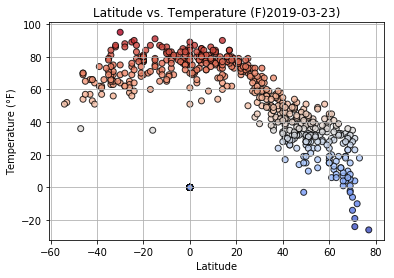

In [16]:
plt.scatter(cleaned_df['Latitude'],
           cleaned_df['Temperature (F)'],
           c=cleaned_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Temperature (F)" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("latitude_vs_temp_scatter_plot.png")
plt.show()

#### Latitude vs. Humidity Plot

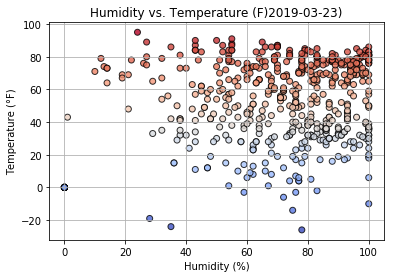

In [20]:
plt.scatter(cleaned_df["Humidity (%)"],
           cleaned_df["Temperature (F)"],
           c=cleaned_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Humidity vs. Temperature (F)" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Humidity (%)", fontsize=10)
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("humidity_vs_temp_scatter_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

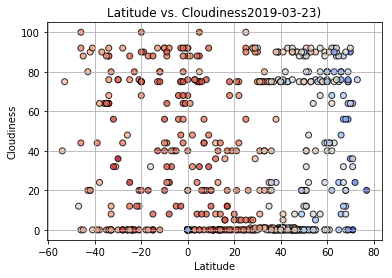

In [18]:
plt.scatter(cleaned_df["Latitude"],
           cleaned_df["Cloudiness"],
           c=cleaned_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Cloudiness" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("latitude_vs_cloudiness_scatter_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

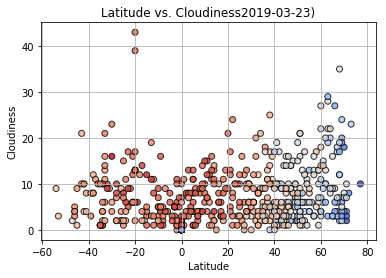

In [19]:
plt.scatter(cleaned_df["Latitude"],
           cleaned_df["Wind Speed (MPH)"],
           c=cleaned_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Cloudiness" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("latitude_vs_windspeed_scatter_plot.png")
plt.show()